<a href="https://colab.research.google.com/github/njadux/Machine-Learning/blob/main/Review_SentimenAnalysist_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment-Analysis-with-VADER-and-RoBERTa
This notebook demonstrates a comprehensive sentiment analysis project on a dataset of customer reviews. It includes:

- Data Preprocessing: Cleaning, tokenizing, and lemmatizing text to prepare it for analysis.
- Feature Extraction: Using TF-IDF to represent text numerically.
- Sentiment Analysis Models:


---
- VADER (Lexicon-based): Calculates sentiment polarity (positive, neutral,
negative) using pre-defined rules.
- RoBERTa (Transformer-based): Provides sentiment classification using probabilities for negative, neutral, and positive sentiments.
- Visualization: Distribution of sentiment scores and ratings using Seaborn.
- Comparison: Contrasting results from VADER and RoBERTa on the same dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download required resources for NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**STEP 0**

In [15]:
#reading data
data=pd.read_csv('/content/drive/MyDrive/datasets/Reviews.csv')

In [16]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [17]:
#checking for null values
data.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [18]:
#checking for duplicates
data.duplicated().sum()

0

In [19]:
data.shape

(568454, 10)

<ipython-input-20-12ebe097640e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Score', data=data, palette='viridis')


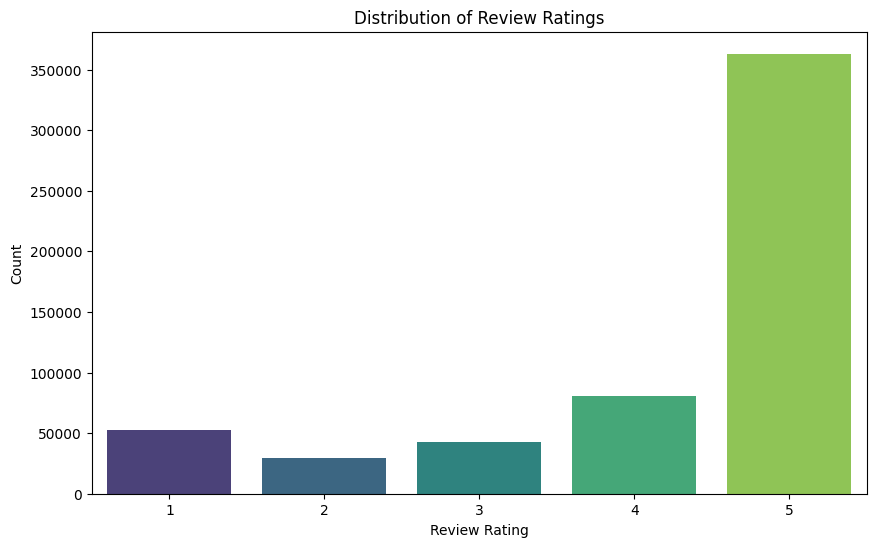

In [20]:
#plotting the distribution of review ratings.
plt.figure(figsize=(10, 6))
sns.countplot(x='Score', data=data, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Count')
plt.show()

In [29]:
import nltk
nltk.download('punkt_tab')

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [30]:
def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()

    # 2. Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # 3. Tokenize the text
    words = word_tokenize(text)

    # 4. Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    # 5. Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # 6. Join the words back into a single string
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
data['processed_text'] = data['Text'].apply(preprocess_text)


In [31]:
data.to_csv('preprocessed_reviews.csv')

In [32]:
example = data['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [33]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [34]:
#convert data into TD_IDF form (numircal form)
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['processed_text'])

In [35]:
X.shape

(568454, 215238)

In [36]:
data['processed_text']

,processed_text
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around century light pillowy citrus...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...
...,...
568449,great sesame chickenthis good better resturant...
568450,im disappointed flavor chocolate note especial...
568451,star small give one training session tried tra...
568452,best treat training rewarding dog good groomin...


In [37]:
Y=data['Score']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [38]:
Y.shape

(568454,)

**Step 1**

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [40]:
sia = SentimentIntensityAnalyzer()

In [41]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [42]:
Vader_result = {}

In [43]:
# Run the polarity score on the entire dataset
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Text']
    myid = row['Id']
    Vader_result[myid] = sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [44]:
sia.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [45]:
vaders = pd.DataFrame(Vader_result).T

In [46]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})

In [47]:
vaders = vaders.merge(data, how='left')

In [48]:
# Now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,processed_text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


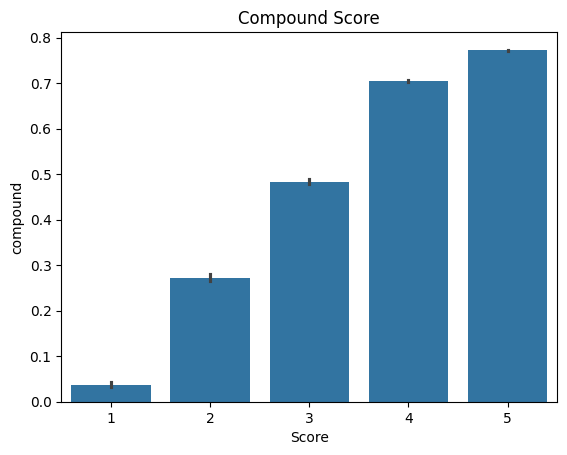

In [49]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score')
plt.show()

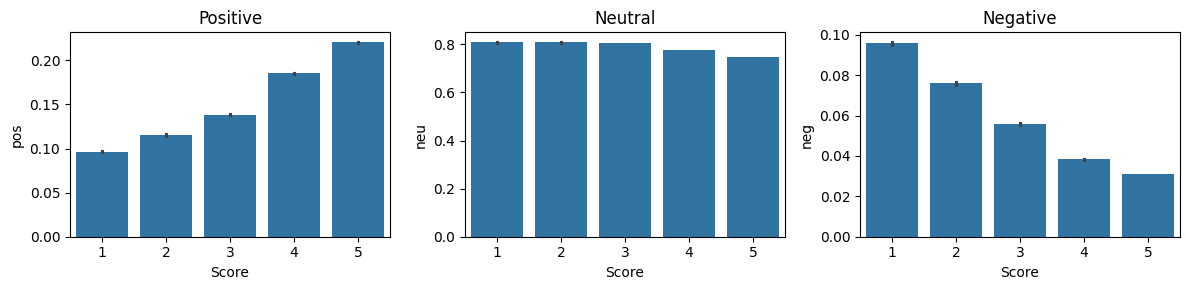

In [50]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

**STEP 2**

In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [52]:
roberta_model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(roberta_model)
model = AutoModelForSequenceClassification.from_pretrained(roberta_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

**Run for Roberta Model **

  Fundamental step in NLP to allow machine understands Human lang


*   Breaking text into tokens (smaller units)
*   Encoding each token


In [53]:
tokenizer(example, return_tensors= 'pt')

{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [54]:
encoded_text = tokenizer(example, return_tensors= 'pt')
# unpacking the ecoded text before assigning them
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [55]:
# calculating the probabilities for each class
scores = output[0][0].detach().numpy() # extracts logits for first class and sequence
scores = softmax(scores) #converting them into probabilities
scores

array([0.97635514, 0.02068746, 0.00295737], dtype=float32)

In [56]:
# reporting scores in neg, neu, and pos format
scores_report = {
    'roberta_negative' : scores[0],
    'roberta_neutral'  : scores[1],
    'roberta_positive' : scores[2]
}
print(scores_report)

{'roberta_negative': 0.97635514, 'roberta_neutral': 0.020687465, 'roberta_positive': 0.0029573706}


In [57]:
scores_report_Table = pd.DataFrame(scores_report, index=[0]).T

In [58]:
scores_report_Table

,0
roberta_negative,0.976355
roberta_neutral,0.020687
roberta_positive,0.002957


In [59]:
def polarity_scores_roberta(text):
    encoded = tokenizer(example, return_tensors= 'pt')
    output = model(**encoded)
    scores_polarity_roberta = output[0][0].detach().numpy()
    scores_polarity_roberta = softmax(scores_polarity_roberta)
    scores_polarity_roberta_report = {
        'roberta_negative' : scores[0],
        'roberta_neutral'  : scores[1],
        'roberta_positive' : scores[2]
    }
    return scores_polarity_roberta_report

In [60]:
Roberta_result = {}
both_results_list = [] # initialize both_results_list

In [ ]:
for i, row in tqdm(data.iterrows(), total = len(data)):
  try:
    text = row['Text']
    my_id = row['Id']

    Vader_result = sia.polarity_scores(text)
    Vader_result_name = {}                           # creating empty dic named vader result rename

    for key, result in Vader_result.items():           # iterating through the vader result and Changing result to value
      Vader_result_name[f"vader_{key}"] = result        # creating key by adding (vader_) prefix and assign the value (result) to it in the dic
    Roberta_result = polarity_scores_roberta(text)

    # combining both the vader scores results and the roberta scores results
    both_results = {**Vader_result_name, **Roberta_result}
    both_results_list.append(both_results)

    # Use my_id to store results
    Roberta_result[my_id] = both_results
  except RuntimeError:
    print(f'Broke for id {my_id}') # Use my_id for consistency

  0%|          | 0/568454 [00:00<?, ?it/s]

In [ ]:
# Print the column names of the DataFrame to verify the correct column name
print(data.columns)

In [ ]:
# creates a new DF from resulting dictionary and swaps it vertically
results_from_roberta = pd.DataFrame(Roberta_result).T

In [ ]:
# renames the column that was previously the index of the DataFrame
results_from_roberta = results_from_roberta.result.index()rename(columns={'index' : 'Roberta ID'})

In [ ]:
# merging the new colun to the DataFrame
results_from_roberta = pd.DataFrame(resulting).merge(data, how='left')

In [ ]:
results_from_roberta.head()

In [ ]:
results_from_roberta.columns

Compare scores between models

In [ ]:
sns.pairplot(data=results_from_roberta, vars=['vader_neg', 'vader_neu', 'vader_pos', 'roberta_negative', 'roberta_neu', 'roberta_positive'],
             hue='Score',
             palette='tab10')
plt.show()

**STEP 3 Review Examples**

In [ ]:
# look at some examples where the model score reviews
# sorting the values according too the highst roberta positive and cancle the ascending
# take the values of that and print the top value
results_from_roberta.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
# doing the same thing with vader
vaders.query('score == 1') \
    .sort_values('vader_pos', ascending=False)['Text'].values[0]

In [ ]:
# negative sentiment 5-star review
results_from_roberta.query('Score == 5') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
vaders.query('Score == 5') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

In [ ]:
from transformers import pipeline
#using hugging face transforers

sentiment_pipeline = pipeline("sentiment-analysis")

In [ ]:
sentiment_pipeline('I am so happy')

In [ ]:
sentiment_pipeline('I would like to return my money')